In [1]:
%matplotlib notebook
%load_ext autoreload
%autoreload 1
!hostname
!pwd

dv002.bridges2.psc.edu
/ocean/projects/asc170022p/mtragoza/mre-pinn/MICCAI-2023


In [2]:
import sys, os, pathlib
import numpy as np
import xarray as xr
import torch
import matplotlib.pyplot as plt
import seaborn as sns

os.environ['DDEBACKEND'] = 'pytorch'
import deepxde

sys.path.append('..')
%aimport mre_pinn

torch.cuda.is_available()

Using backend: pytorch



True

In [ ]:
%autoreload
#bioqic = mre_pinn.data.BIOQICPhantom('../data/BIOQIC/downloads')
#bioqic.download()
bioqic.load_mat()
bioqic.preprocess()
dataset = bioqic.to_dataset()
dataset.save_xarrays('../data/BIOQIC/phantom')

In [3]:
%autoreload
frequency = 80
example = mre_pinn.data.MREExample.load_xarrays('../data/BIOQIC/phantom', frequency, anat=True)
example.metadata

Loading ../data/BIOQIC/phantom/80/wave.nc
Loading ../data/BIOQIC/phantom/80/mre.nc
Loading ../data/BIOQIC/phantom/80/mre_mask.nc
Loading ../data/BIOQIC/phantom/80/anat.nc
Loading ../data/BIOQIC/phantom/80/anat_mask.nc


  return key in self.data



size  spacing  origin   limit   center  extent
variable dimension                                                
wave     x           128   0.0015     0.0  0.1905  0.09525  0.1920
         y            80   0.0015     0.0  0.1185  0.05925  0.1200
         z            25   0.0015     0.0  0.0360  0.01800  0.0375
mre      x           128   0.0015     0.0  0.1905  0.09525  0.1920
         y            80   0.0015     0.0  0.1185  0.05925  0.1200
         z            25   0.0015     0.0  0.0360  0.01800  0.0375
mre_mask x           128   0.0015     0.0  0.1905  0.09525  0.1920
         y            80   0.0015     0.0  0.1185  0.05925  0.1200
         z            25   0.0015     0.0  0.0360  0.01800  0.0375
anat     x           128   0.0015     0.0  0.1905  0.09525  0.1920
         y            80   0.0015     0.0  0.1185  0.05925  0.1200
         z            25   0.0015     0.0  0.0360  0.01800  0.0375

In [4]:
example.describe()

dtype     count                     mean  \
variable component                                                  
wave     z          complex128  256000.0  -0.00008700+0.00007000j   
         x          complex128  256000.0   0.00006600+0.00000300j   
         y          complex128  256000.0   0.00014300-0.00055500j   
mre      scalar     complex128  256000.0  5833.823312+218.366417j   
mre_mask scalar          int64  256000.0   0.63810500+0.00000000j   
anat     z             float64  256000.0   317.1963002+0.0000000j   
         x             float64  256000.0   317.5180708+0.0000000j   
         y             float64  256000.0   316.9898007+0.0000000j   

                            std                 min                 25%  \
variable component                                                        
wave     z             0.003677 -0.014230-0.005919j -0.001781+0.001272j   
         x             0.004614 -0.011428+0.002524j -0.001673+0.001793j   
         y             0.013011 -0.026548+0.003513j -0.003184+0.001840j   
mre      scalar     5568.088756  0.000000+0.000000j  0.000000+0.000000j   
mre_mask scalar        0.727037  0.000000+0.000000j  0.000000+0.000000j   
anat     z           231.599891  0.000000+0.000000j   57.12500+0.00000j   
         x           232.539772  0.000000+0.000000j   57.12500+0.00000j   
         y           231.862697  0.000000+0.000000j   57.00000+0.00000j   

                                         50%                       75%  \
variable component                                                       
wave     z         -0.000189000-0.001859000j  0.001495000-0.000458000j   
         x          0.000053000+0.003829000j  0.001793000-0.006779000j   
         y          0.000298000+0.000855000j  0.003668000+0.000938000j   
mre      scalar     10097.662129+358.617637j  10097.662129+358.617637j   
mre_mask scalar     1.000000000+0.000000000j  1.000000000+0.000000000j   
anat     z          460.37000005+0.00000000j  525.87000005+0.00000000j   
         x          461.12000005+0.00000000j  526.70000005+0.00000000j   
         y          459.00000005+0.00000000j  527.00000000+0.00000000j   

                                          max  
variable component                             
wave     z           0.011644000+0.000187000j  
         x           0.011845000-0.002012000j  
         y           0.025939000-0.003657000j  
mre      scalar     35183.797846+2546.696361j  
mre_mask scalar      5.000000000+0.000000000j  
anat     z          2332.20000005+0.00000000j  
         x          2428.00000005+0.00000000j  
         y          2386.20000005+0.00000000j

Evaluating direct baseline
Evaluating FEM baseline
100%|██████████| 25/25 [00:43<00:00,  1.76s/it]


<IPython.core.display.Javascript object>


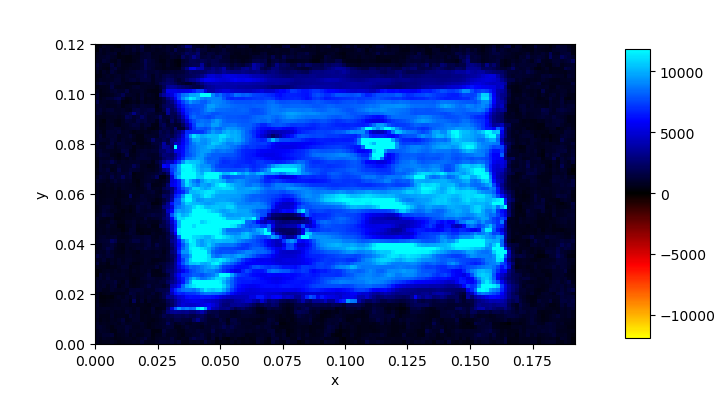

interactive(children=(SelectionSlider(description='part', options=(('abs', 0), ('angle', 1)), value=0), Select…

<IPython.core.display.Javascript object>


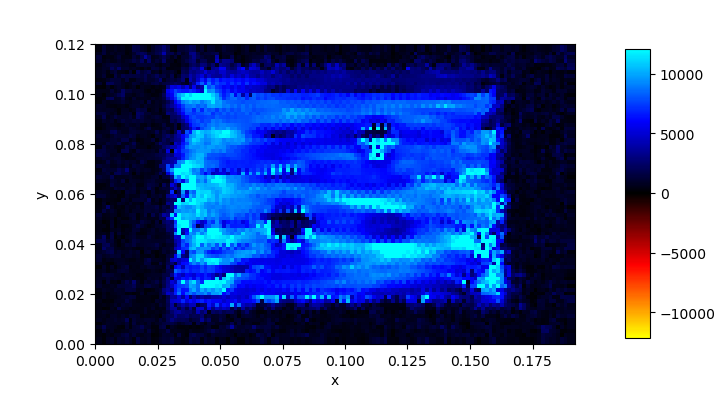

interactive(children=(SelectionSlider(description='part', options=(('abs', 0), ('angle', 1)), value=0), Select…

In [5]:
%autoreload
mre_pinn.baseline.eval_direct_baseline(example, frequency)
mre_pinn.baseline.eval_fem_baseline(example, frequency, mesh_scale=2, hetero=True)
example.view('direct', 'fem', polar=True, ax_height=3)

<IPython.core.display.Javascript object>


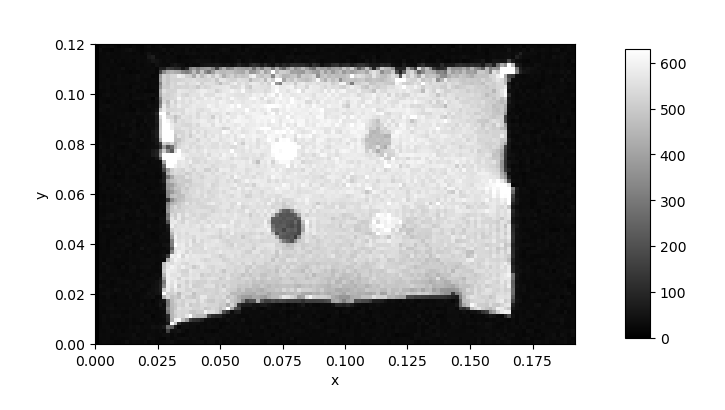

interactive(children=(SelectionSlider(description='part', options=(('real', 0), ('imag', 1)), value=0), Select…

<IPython.core.display.Javascript object>


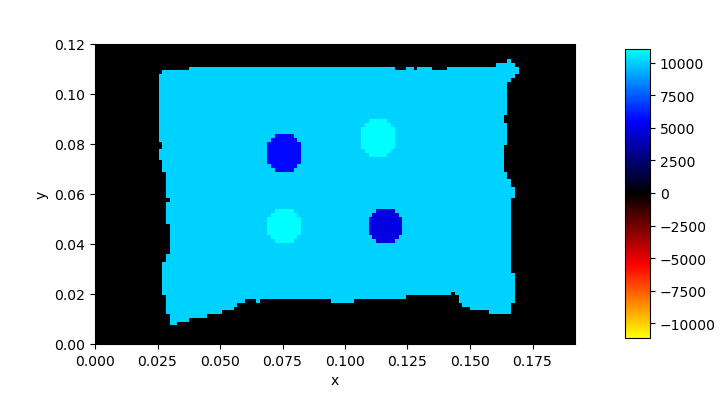

interactive(children=(SelectionSlider(description='part', options=(('real', 0), ('imag', 1)), value=0), Select…

In [6]:
%autoreload
example.view('anat', 'mre', ax_height=3, mask=0.5)

In [7]:
pde = mre_pinn.pde.WaveEquation.from_name('hetero', omega=example.wave.frequency.item(), detach=True)

In [9]:
%autoreload
pinn = mre_pinn.model.MREPINN(
    example,
    omega=120,
    n_layers=5,
    n_hidden=128,
    polar_input=False
)
pinn

MREPINN(
  (u_pinn): PINN(
    (hidden0): Linear(in_features=3, out_features=128, bias=True)
    (hidden1): Linear(in_features=131, out_features=128, bias=True)
    (hidden2): Linear(in_features=259, out_features=128, bias=True)
    (hidden3): Linear(in_features=387, out_features=128, bias=True)
    (output): Linear(in_features=515, out_features=6, bias=True)
  )
  (mu_pinn): PINN(
    (hidden0): Linear(in_features=3, out_features=128, bias=True)
    (hidden1): Linear(in_features=131, out_features=128, bias=True)
    (hidden2): Linear(in_features=259, out_features=128, bias=True)
    (hidden3): Linear(in_features=387, out_features=128, bias=True)
    (output): Linear(in_features=515, out_features=8, bias=True)
  )
)

In [10]:
%autoreload
model = mre_pinn.training.MREPINNModel(
    example, pinn, pde,
    loss_weights=[1, 0, 100, 1e-10],
    pde_warmup_iters=5000,
    pde_step_iters=5000,
    pde_init_weight=1e-12,
    n_points=1024
)
model.compile(optimizer='adam', lr=1e-4, loss=mre_pinn.training.losses.msae_loss)

Compiling model...
'compile' took 0.000305 s



In [11]:
torch.backends.cudnn.enabled = True
torch.backends.cudnn.benchmark = False
model.benchmark(100)

# iterations: 100
Data time/iter:  0.0146s (10.63%)
Model time/iter: 0.0569s (41.55%)
Loss time/iter:  0.0655s (47.82%)
Total time/iter: 0.1370s
Total time: 13.7034s
1k iters time: 2.28m
10k iters time: 22.84m
100k iters time: 3.81h


<IPython.core.display.Javascript object>


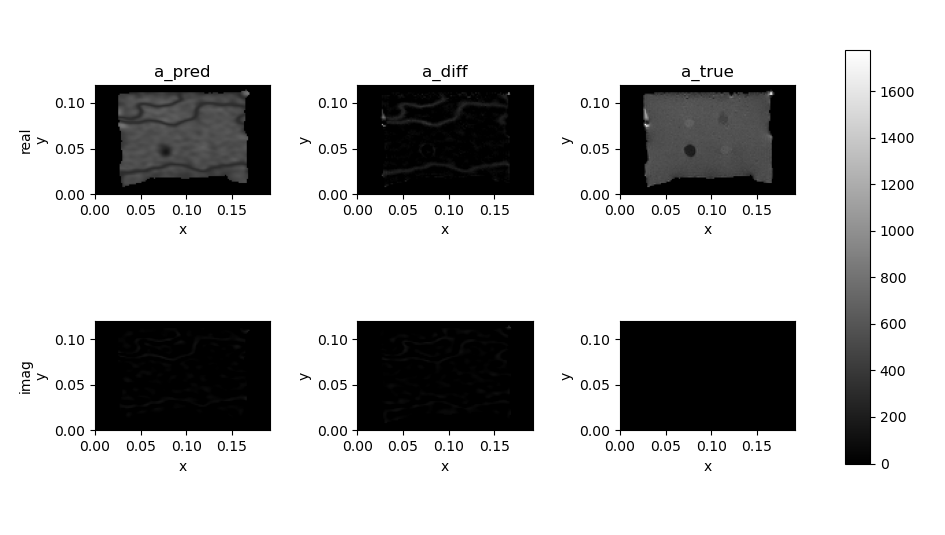

interactive(children=(SelectionSlider(description='domain', options=(('space', 0), ('frequency', 1)), value=0)…

<IPython.core.display.Javascript object>


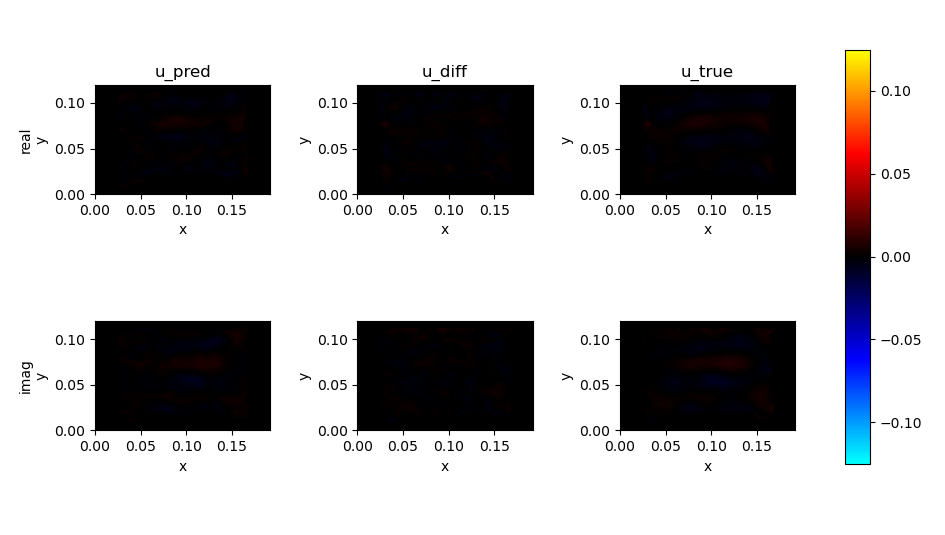

interactive(children=(SelectionSlider(description='domain', options=(('space', 0), ('frequency', 1)), value=0)…

<IPython.core.display.Javascript object>


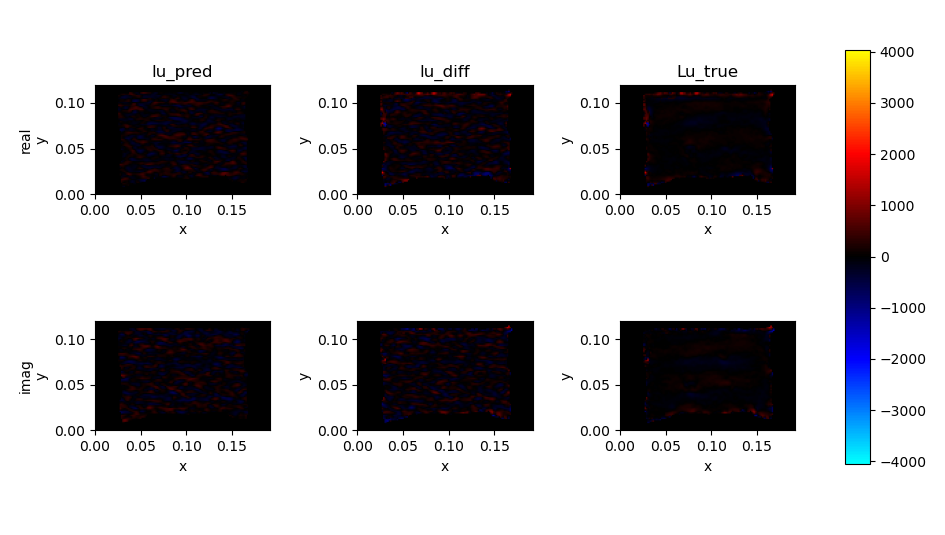

interactive(children=(SelectionSlider(description='domain', options=(('space', 0), ('frequency', 1)), value=0)…

<IPython.core.display.Javascript object>


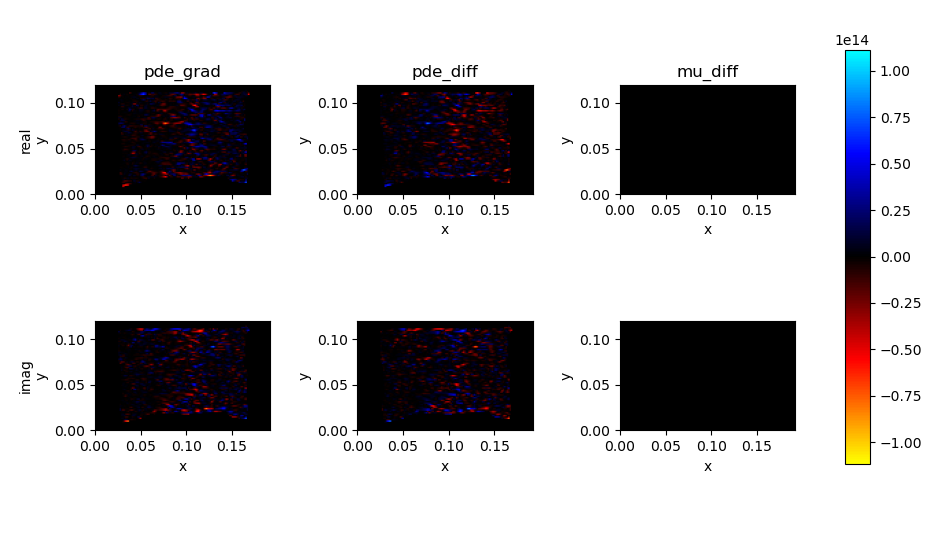

interactive(children=(SelectionSlider(description='domain', options=(('space', 0), ('frequency', 1)), value=0)…

<IPython.core.display.Javascript object>


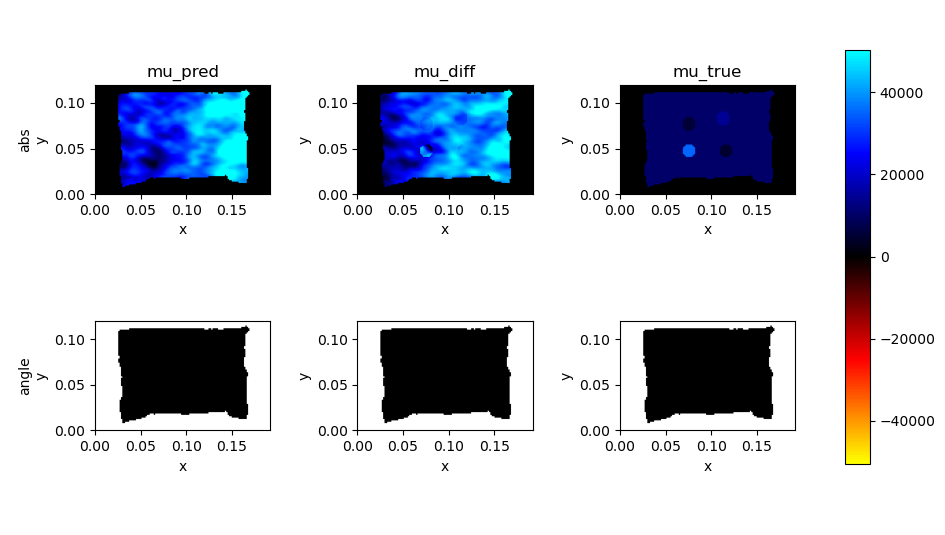

interactive(children=(SelectionSlider(description='domain', options=(('space', 0), ('frequency', 1)), value=0)…

<IPython.core.display.Javascript object>


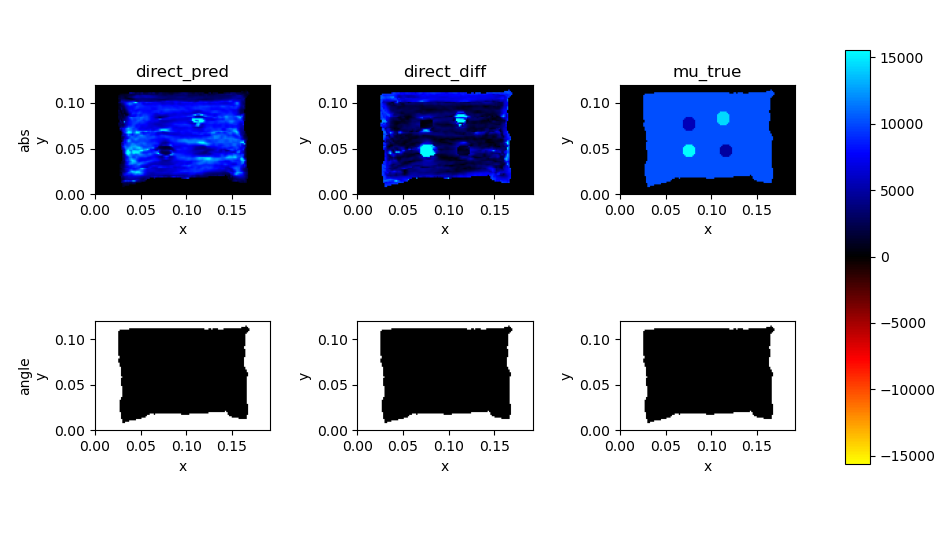

interactive(children=(SelectionSlider(description='domain', options=(('space', 0), ('frequency', 1)), value=0)…

<IPython.core.display.Javascript object>


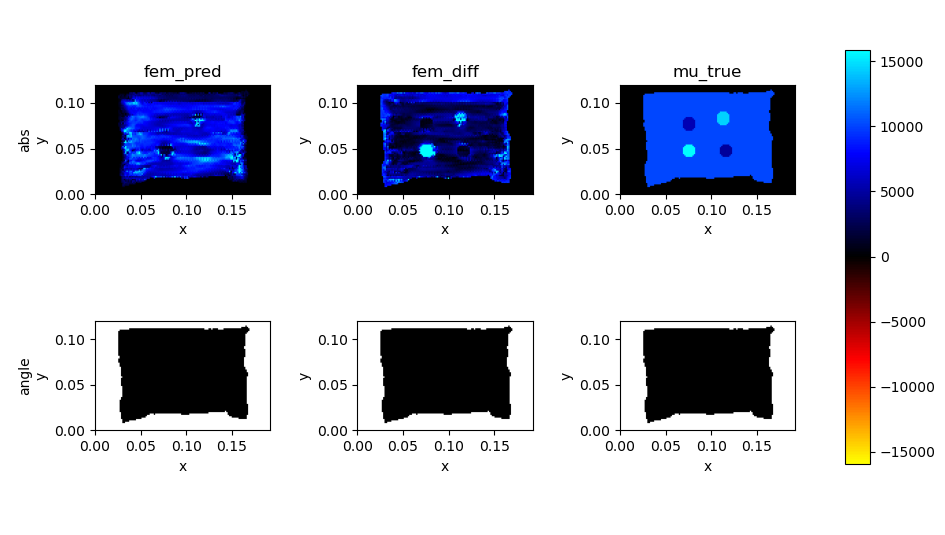

interactive(children=(SelectionSlider(description='domain', options=(('space', 0), ('frequency', 1)), value=0)…

In [12]:
%autoreload
test_eval = mre_pinn.testing.TestEvaluator(test_every=100, interact=True)
test_eval.model = model
test_eval.test()

Training model...

Step      Train loss                                  Test loss                                   Test metric
0         [2.21e-03, 0.00e+00, 5.50e+07, 0.00e+00]    [2.19e-03, 0.00e+00, 5.52e+07, 0.00e+00]    []  


<IPython.core.display.Javascript object>


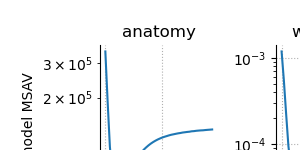

<IPython.core.display.Javascript object>


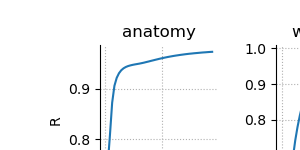

<IPython.core.display.Javascript object>


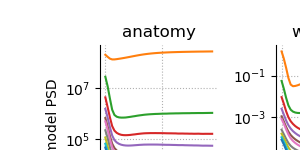

<IPython.core.display.Javascript object>


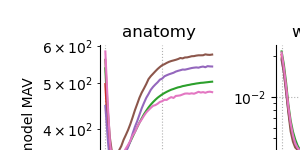

Time spent testing: 64.5821 (33.13%)
10        [2.06e-03, 0.00e+00, 5.23e+07, 0.00e+00]    [2.04e-03, 0.00e+00, 5.12e+07, 0.00e+00]    []  
20        [1.90e-03, 0.00e+00, 4.79e+07, 0.00e+00]    [1.90e-03, 0.00e+00, 4.75e+07, 0.00e+00]    []  
30        [1.77e-03, 0.00e+00, 4.33e+07, 0.00e+00]    [1.77e-03, 0.00e+00, 4.41e+07, 0.00e+00]    []  
40        [1.65e-03, 0.00e+00, 4.18e+07, 0.00e+00]    [1.65e-03, 0.00e+00, 4.09e+07, 0.00e+00]    []  
50        [1.61e-03, 0.00e+00, 4.08e+07, 0.00e+00]    [1.53e-03, 0.00e+00, 3.79e+07, 0.00e+00]    []  
60        [1.44e-03, 0.00e+00, 3.51e+07, 0.00e+00]    [1.42e-03, 0.00e+00, 3.51e+07, 0.00e+00]    []  
70        [1.33e-03, 0.00e+00, 3.37e+07, 0.00e+00]    [1.32e-03, 0.00e+00, 3.25e+07, 0.00e+00]    []  
80        [1.26e-03, 0.00e+00, 3.02e+07, 0.00e+00]    [1.22e-03, 0.00e+00, 3.01e+07, 0.00e+00]    []  
90        [1.15e-03, 0.00e+00, 2.71e+07, 0.00e+00]    [1.13e-03, 0.00e+00, 2.78e+07, 0.00e+00]    []  
100       [1.09e-03, 0.00e+00, 2.65e

780       [6.46e-05, 0.00e+00, 3.78e+06, 0.00e+00]    [6.72e-05, 0.00e+00, 3.81e+06, 0.00e+00]    []  
790       [6.26e-05, 0.00e+00, 3.62e+06, 0.00e+00]    [6.62e-05, 0.00e+00, 3.78e+06, 0.00e+00]    []  
800       [6.10e-05, 0.00e+00, 3.55e+06, 0.00e+00]    [6.51e-05, 0.00e+00, 3.75e+06, 0.00e+00]    []  
Time spent testing: 59.3087 (73.34%)
810       [6.05e-05, 0.00e+00, 3.66e+06, 0.00e+00]    [6.41e-05, 0.00e+00, 3.73e+06, 0.00e+00]    []  
820       [6.07e-05, 0.00e+00, 3.49e+06, 0.00e+00]    [6.31e-05, 0.00e+00, 3.71e+06, 0.00e+00]    []  
830       [6.16e-05, 0.00e+00, 3.42e+06, 0.00e+00]    [6.22e-05, 0.00e+00, 3.69e+06, 0.00e+00]    []  
840       [5.64e-05, 0.00e+00, 3.43e+06, 0.00e+00]    [6.12e-05, 0.00e+00, 3.67e+06, 0.00e+00]    []  
850       [5.64e-05, 0.00e+00, 3.26e+06, 0.00e+00]    [6.02e-05, 0.00e+00, 3.64e+06, 0.00e+00]    []  
860       [5.67e-05, 0.00e+00, 3.38e+06, 0.00e+00]    [5.92e-05, 0.00e+00, 3.62e+06, 0.00e+00]    []  
870       [5.54e-05, 0.00e+00, 3.37e

1550      [1.97e-05, 0.00e+00, 2.25e+06, 0.00e+00]    [2.11e-05, 0.00e+00, 2.31e+06, 0.00e+00]    []  
1560      [2.01e-05, 0.00e+00, 2.14e+06, 0.00e+00]    [2.09e-05, 0.00e+00, 2.29e+06, 0.00e+00]    []  
1570      [2.04e-05, 0.00e+00, 2.25e+06, 0.00e+00]    [2.06e-05, 0.00e+00, 2.27e+06, 0.00e+00]    []  
1580      [1.91e-05, 0.00e+00, 2.06e+06, 0.00e+00]    [2.04e-05, 0.00e+00, 2.25e+06, 0.00e+00]    []  
1590      [1.93e-05, 0.00e+00, 2.16e+06, 0.00e+00]    [2.01e-05, 0.00e+00, 2.24e+06, 0.00e+00]    []  
1600      [1.87e-05, 0.00e+00, 2.01e+06, 0.00e+00]    [1.99e-05, 0.00e+00, 2.23e+06, 0.00e+00]    []  
Time spent testing: 59.3213 (79.46%)
1610      [1.87e-05, 0.00e+00, 2.09e+06, 0.00e+00]    [1.96e-05, 0.00e+00, 2.21e+06, 0.00e+00]    []  
1620      [1.83e-05, 0.00e+00, 2.12e+06, 0.00e+00]    [1.94e-05, 0.00e+00, 2.20e+06, 0.00e+00]    []  
1630      [1.82e-05, 0.00e+00, 2.01e+06, 0.00e+00]    [1.91e-05, 0.00e+00, 2.19e+06, 0.00e+00]    []  
1640      [1.83e-05, 0.00e+00, 2.11e

2320      [9.60e-06, 0.00e+00, 1.47e+06, 0.00e+00]    [1.01e-05, 0.00e+00, 1.52e+06, 0.00e+00]    []  
2330      [9.91e-06, 0.00e+00, 1.37e+06, 0.00e+00]    [9.99e-06, 0.00e+00, 1.52e+06, 0.00e+00]    []  
2340      [9.39e-06, 0.00e+00, 1.45e+06, 0.00e+00]    [9.90e-06, 0.00e+00, 1.51e+06, 0.00e+00]    []  
2350      [9.47e-06, 0.00e+00, 1.49e+06, 0.00e+00]    [9.82e-06, 0.00e+00, 1.51e+06, 0.00e+00]    []  
2360      [9.72e-06, 0.00e+00, 1.47e+06, 0.00e+00]    [9.74e-06, 0.00e+00, 1.49e+06, 0.00e+00]    []  
2370      [9.74e-06, 0.00e+00, 1.59e+06, 0.00e+00]    [9.67e-06, 0.00e+00, 1.49e+06, 0.00e+00]    []  
2380      [9.46e-06, 0.00e+00, 1.47e+06, 0.00e+00]    [9.60e-06, 0.00e+00, 1.48e+06, 0.00e+00]    []  
2390      [9.11e-06, 0.00e+00, 1.54e+06, 0.00e+00]    [9.53e-06, 0.00e+00, 1.48e+06, 0.00e+00]    []  
2400      [9.08e-06, 0.00e+00, 1.44e+06, 0.00e+00]    [9.46e-06, 0.00e+00, 1.47e+06, 0.00e+00]    []  
Time spent testing: 58.7639 (82.00%)
2410      [9.26e-06, 0.00e+00, 1.59e

3100      [5.98e-06, 0.00e+00, 1.04e+06, 0.00e+00]    [6.08e-06, 0.00e+00, 1.18e+06, 0.00e+00]    []  
Time spent testing: 58.0808 (83.14%)
3110      [6.03e-06, 0.00e+00, 1.35e+06, 0.00e+00]    [6.05e-06, 0.00e+00, 1.18e+06, 0.00e+00]    []  
3120      [5.77e-06, 0.00e+00, 1.06e+06, 0.00e+00]    [6.04e-06, 0.00e+00, 1.18e+06, 0.00e+00]    []  
3130      [5.93e-06, 0.00e+00, 1.02e+06, 0.00e+00]    [6.00e-06, 0.00e+00, 1.18e+06, 0.00e+00]    []  
3140      [5.76e-06, 0.00e+00, 1.15e+06, 0.00e+00]    [5.95e-06, 0.00e+00, 1.18e+06, 0.00e+00]    []  
3150      [5.74e-06, 0.00e+00, 1.08e+06, 0.00e+00]    [5.91e-06, 0.00e+00, 1.17e+06, 0.00e+00]    []  
3160      [5.87e-06, 0.00e+00, 1.13e+06, 0.00e+00]    [5.88e-06, 0.00e+00, 1.16e+06, 0.00e+00]    []  
3170      [5.68e-06, 0.00e+00, 1.04e+06, 0.00e+00]    [5.85e-06, 0.00e+00, 1.16e+06, 0.00e+00]    []  
3180      [5.71e-06, 0.00e+00, 9.95e+05, 0.00e+00]    [5.81e-06, 0.00e+00, 1.16e+06, 0.00e+00]    []  
3190      [5.75e-06, 0.00e+00, 1.10e

3870      [4.04e-06, 0.00e+00, 9.24e+05, 0.00e+00]    [4.13e-06, 0.00e+00, 9.90e+05, 0.00e+00]    []  
3880      [3.97e-06, 0.00e+00, 8.49e+05, 0.00e+00]    [4.10e-06, 0.00e+00, 9.93e+05, 0.00e+00]    []  
3890      [3.96e-06, 0.00e+00, 1.03e+06, 0.00e+00]    [4.08e-06, 0.00e+00, 9.95e+05, 0.00e+00]    []  
3900      [3.77e-06, 0.00e+00, 8.33e+05, 0.00e+00]    [4.06e-06, 0.00e+00, 9.89e+05, 0.00e+00]    []  
Time spent testing: 58.2473 (83.97%)
3910      [3.87e-06, 0.00e+00, 9.73e+05, 0.00e+00]    [4.04e-06, 0.00e+00, 9.83e+05, 0.00e+00]    []  
3920      [4.07e-06, 0.00e+00, 8.54e+05, 0.00e+00]    [4.02e-06, 0.00e+00, 9.77e+05, 0.00e+00]    []  
3930      [4.09e-06, 0.00e+00, 9.00e+05, 0.00e+00]    [4.00e-06, 0.00e+00, 9.74e+05, 0.00e+00]    []  
3940      [4.07e-06, 0.00e+00, 1.06e+06, 0.00e+00]    [4.00e-06, 0.00e+00, 9.73e+05, 0.00e+00]    []  
3950      [4.03e-06, 0.00e+00, 9.48e+05, 0.00e+00]    [3.99e-06, 0.00e+00, 9.76e+05, 0.00e+00]    []  
3960      [4.01e-06, 0.00e+00, 1.04e

4640      [2.84e-06, 0.00e+00, 8.19e+05, 0.00e+00]    [2.94e-06, 0.00e+00, 8.83e+05, 0.00e+00]    []  
4650      [2.83e-06, 0.00e+00, 8.59e+05, 0.00e+00]    [2.93e-06, 0.00e+00, 8.78e+05, 0.00e+00]    []  
4660      [3.02e-06, 0.00e+00, 9.42e+05, 0.00e+00]    [2.92e-06, 0.00e+00, 8.73e+05, 0.00e+00]    []  
4670      [2.75e-06, 0.00e+00, 9.77e+05, 0.00e+00]    [2.90e-06, 0.00e+00, 8.68e+05, 0.00e+00]    []  
4680      [2.92e-06, 0.00e+00, 7.44e+05, 0.00e+00]    [2.88e-06, 0.00e+00, 8.65e+05, 0.00e+00]    []  
4690      [2.95e-06, 0.00e+00, 8.00e+05, 0.00e+00]    [2.87e-06, 0.00e+00, 8.68e+05, 0.00e+00]    []  
4700      [2.72e-06, 0.00e+00, 7.89e+05, 0.00e+00]    [2.85e-06, 0.00e+00, 8.71e+05, 0.00e+00]    []  
Time spent testing: 58.2945 (84.54%)
4710      [2.87e-06, 0.00e+00, 7.85e+05, 0.00e+00]    [2.84e-06, 0.00e+00, 8.69e+05, 0.00e+00]    []  
4720      [2.71e-06, 0.00e+00, 7.76e+05, 0.00e+00]    [2.82e-06, 0.00e+00, 8.64e+05, 0.00e+00]    []  
4730      [2.87e-06, 0.00e+00, 8.61e

In [ ]:
model.train(100000, display_every=10, callbacks=[test_eval])